In [1]:
import numpy as np
import scipy
from itertools import count

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


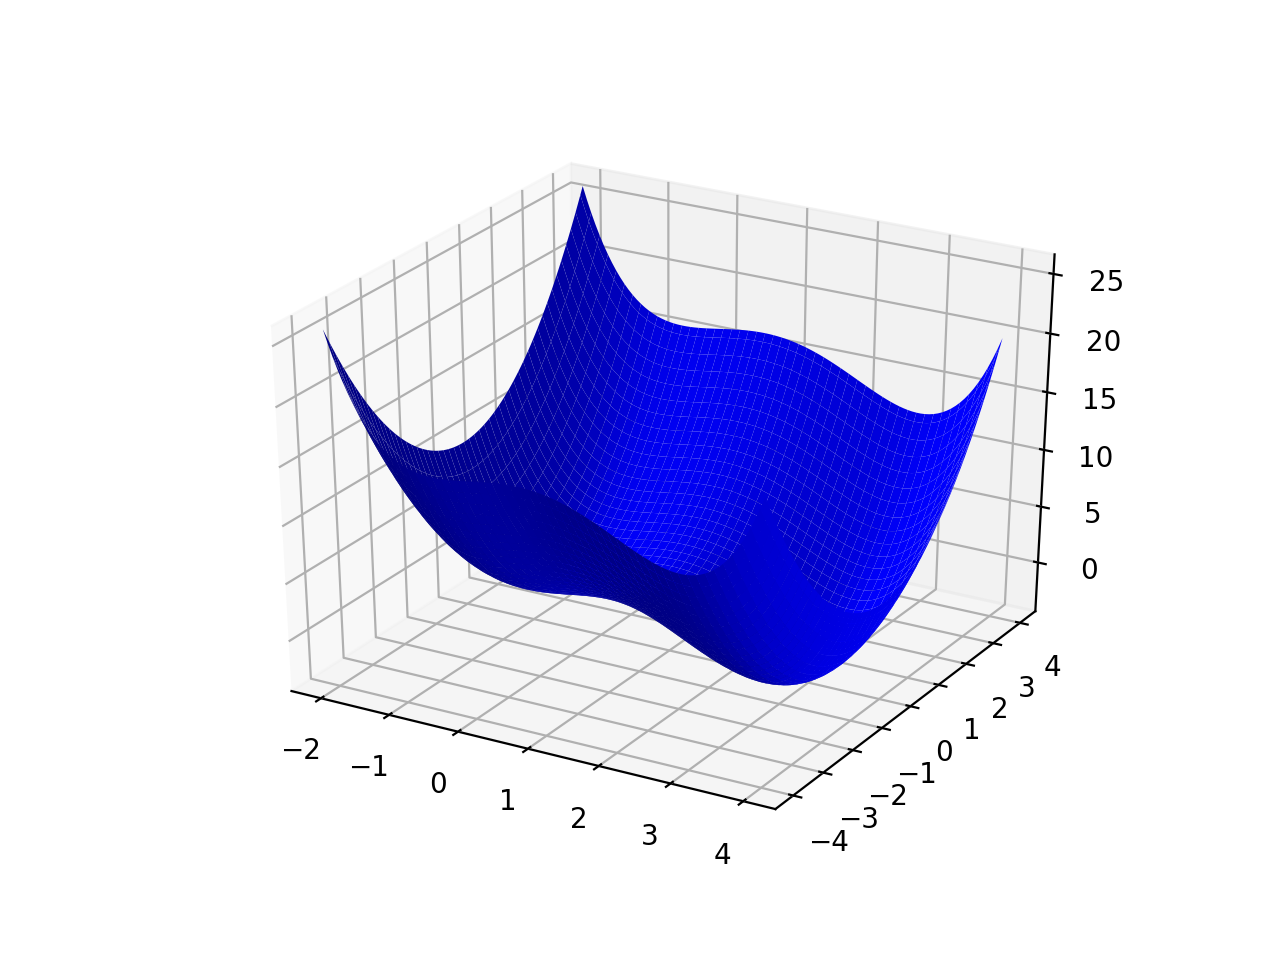

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
x = np.linspace(-2,4, 100)
y = np.linspace(-4,4, 100)
X, Y = np.meshgrid(x, y)
Z = X**4/4 - X**3 + X + Y**2

# Plot the surface
ax.plot_surface(X, Y, Z, color='b')

plt.show()

In [8]:
rate_decay = .0
lr_0 = 0.001
def sgd(x_0, df, lr_gen=None):
    if lr_gen is None:
        lr_gen = (lr_0/t for t in count(1, rate_decay))
    for lr in lr_gen:
        yield x_0
        delta = df(x_0)
        x_0 = x_0 - lr*delta

In [4]:
def df(x):
    a_3, a_2, a_1, a_0 = np.random.normal(loc=0, scale = .75, size=4)
    return np.array([(a_3 + 1)*x[0]**3 + (-3 + a_2)*x[0]**2 + a_1*x[0] + a_0 + 1, 2*x[1]])

rate_decay = .0
lr_0 = 0.005
lr_gen = (lr_0/t for t in count(1, rate_decay))
x_0=[.9,-.25]
max_iter = 10000

<IPython.core.display.Javascript object>


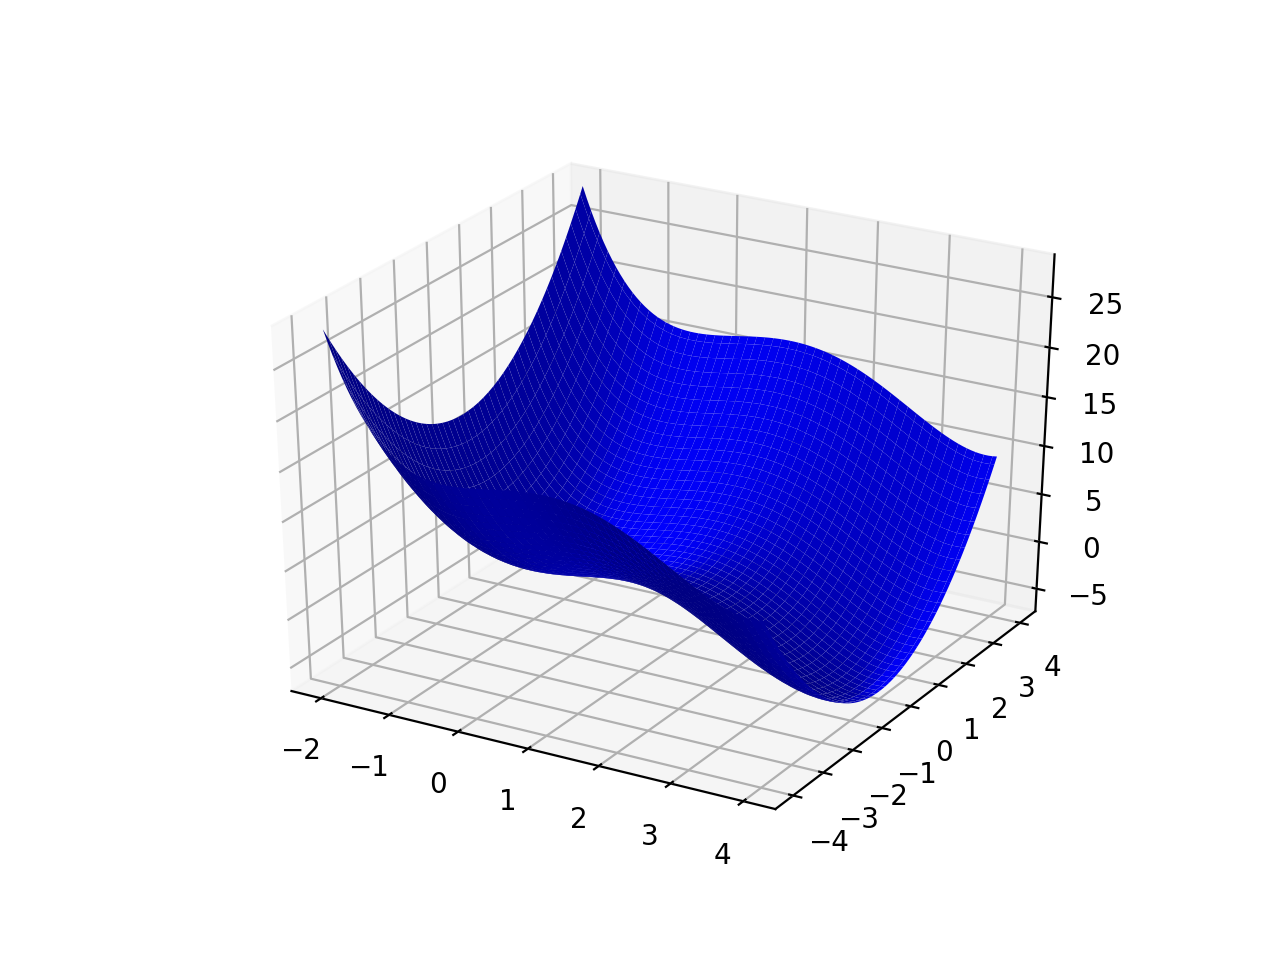

0.036905838336967166 0.5389570832624713


In [368]:
# Samples from surface with noise as in df

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
x = np.linspace(-2,4, 100)
y = np.linspace(-4,4, 100)
X, Y = np.meshgrid(x, y)
a_3, a_2, a_1, a_0 = np.random.normal(loc=0, scale = .5, size=4)
Z = (1+a_3)*X**4/4 - (1-a_2/3)*X**3 + (1+a_1)*X**2/2+ (1+a_0)*X + Y**2
print(a_0, a_1)

# Plot the surface
ax.plot_surface(X, Y, Z, color='b')

plt.show()

In [11]:
def df2(x):
    a_3, a_2, a_1, a_0 = np.random.normal(loc=0, scale = 2, size=4)
    X = x[0]+a_3
    Y = x[1]+a_2
    return np.array([X**3 + -3*X**2 + 1, 2*Y])

rate_decay = .0001
lr_0 = 0.001
lr_gen = (lr_0/t for t in count(1, rate_decay))
x_0=[2,-3]
max_iter = 1000

<IPython.core.display.Javascript object>


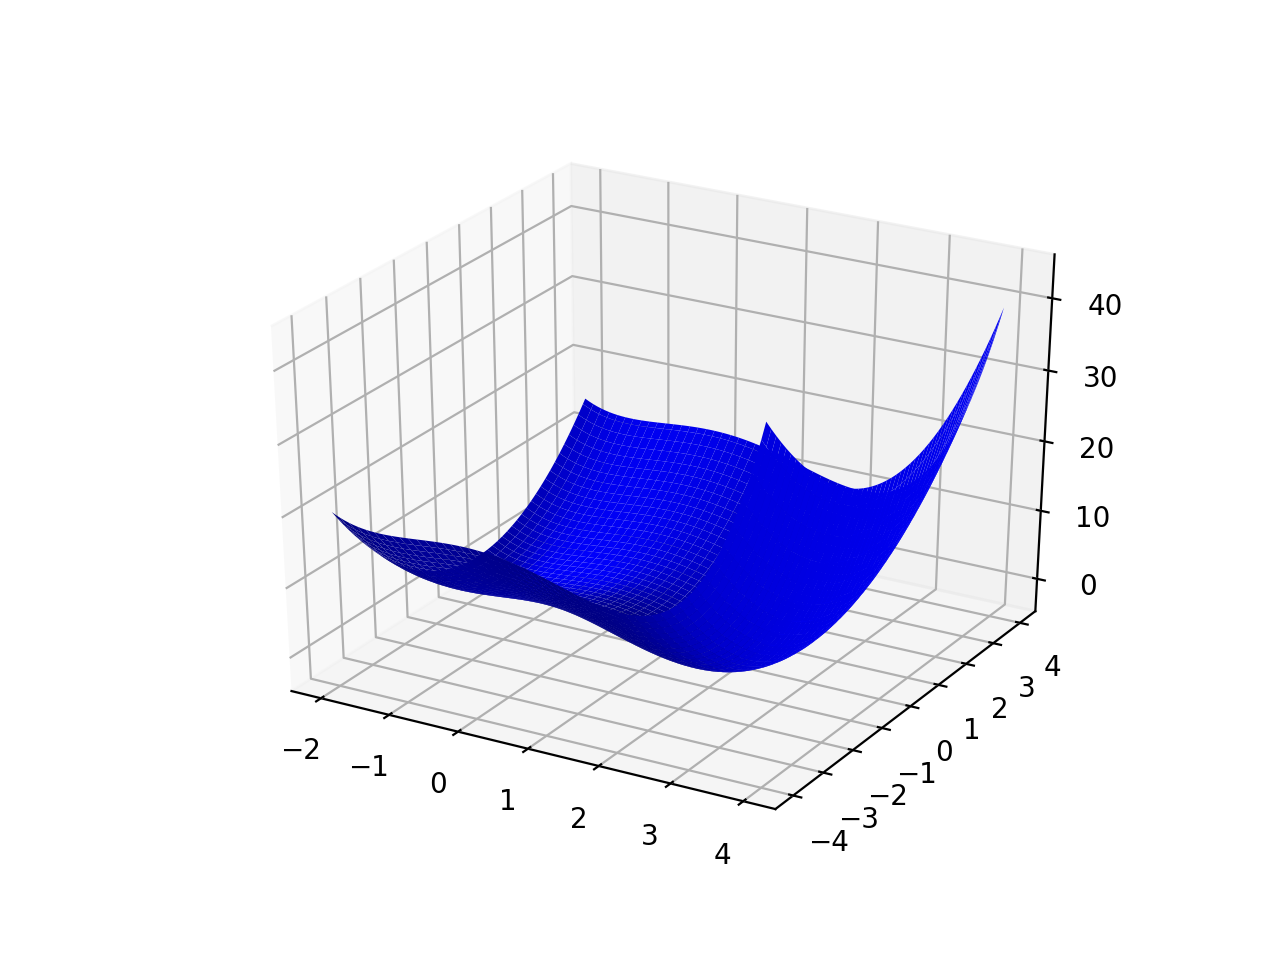

0.7787577101188343 -0.35087422198133644


In [6]:
# Samples from surface with noise as in df2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
x = np.linspace(-2,4, 100)
y = np.linspace(-4,4, 100)
X, Y = np.meshgrid(x, y)
a_1, a_0 = np.random.normal(loc=0, scale = 2, size=2)
Z = (X+a_0)**4/4 - (X+a_0)**3 + (X+a_0) + (Y+a_1)**2
print(a_0, a_1)

# Plot the surface
ax.plot_surface(X, Y, Z, color='b')

plt.show()

In [12]:
xs = []
ys = []
zs = []
for i, w in enumerate(sgd(x_0, df2, lr_gen)):
    if i > max_iter:
        break
    X = w[0]
    Y = w[1]
    xs.append(X)
    ys.append(Y)
    zs.append(X**4/4 - X**3 + X + Y**2)

<IPython.core.display.Javascript object>


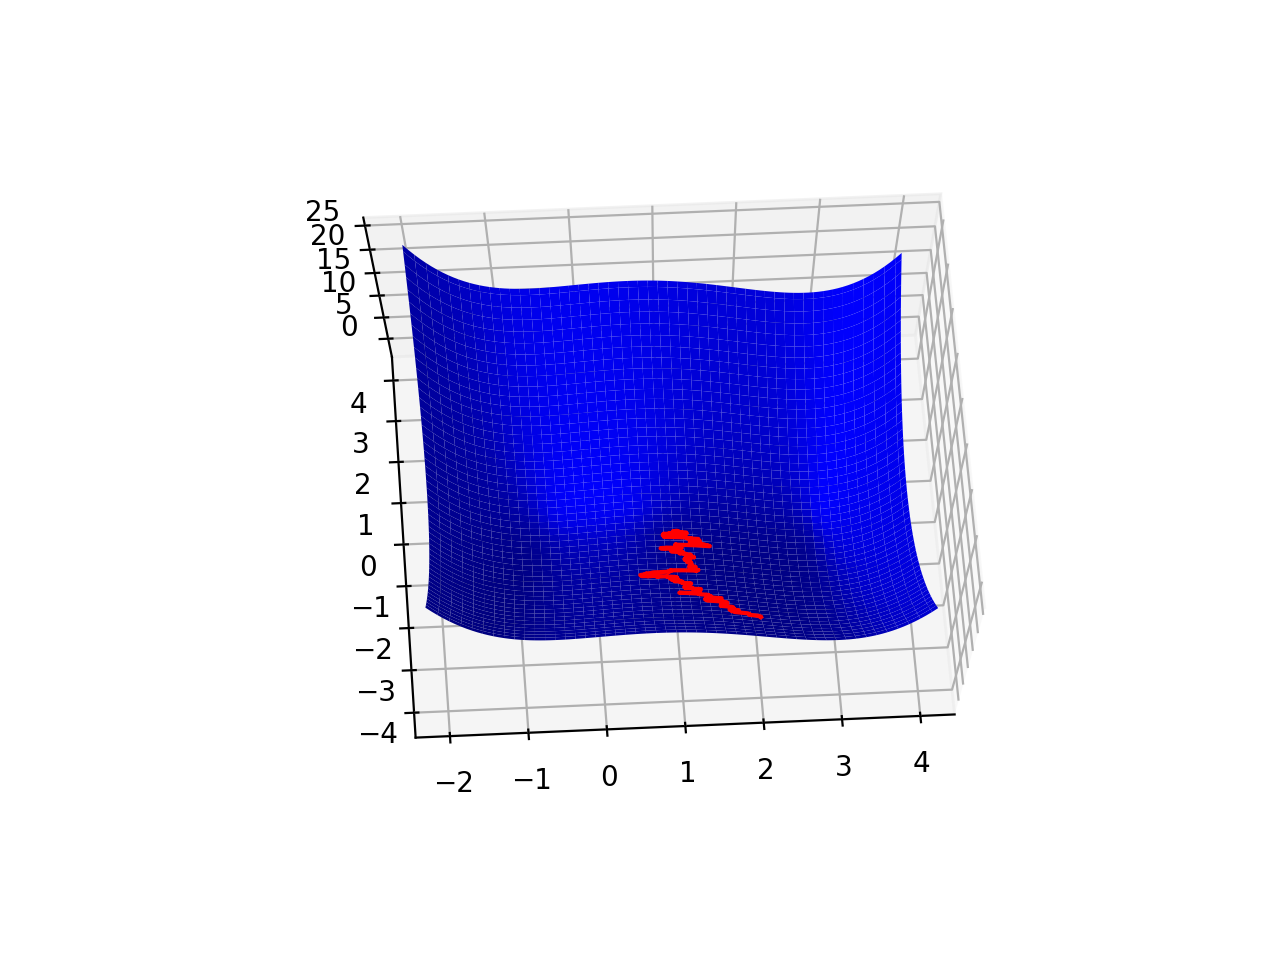

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, color="r")
x = np.linspace(-2,4, 100)
y = np.linspace(-4,4, 100)
X, Y = np.meshgrid(x, y)
Z = X**4/4 - X**3 + X + Y**2
ax.plot_surface(X, Y, Z, color="b")

plt.show()

Consider a plain hill: $z = -x^2/2-y^2/2$, but with noise in the coefficients:

<IPython.core.display.Javascript object>


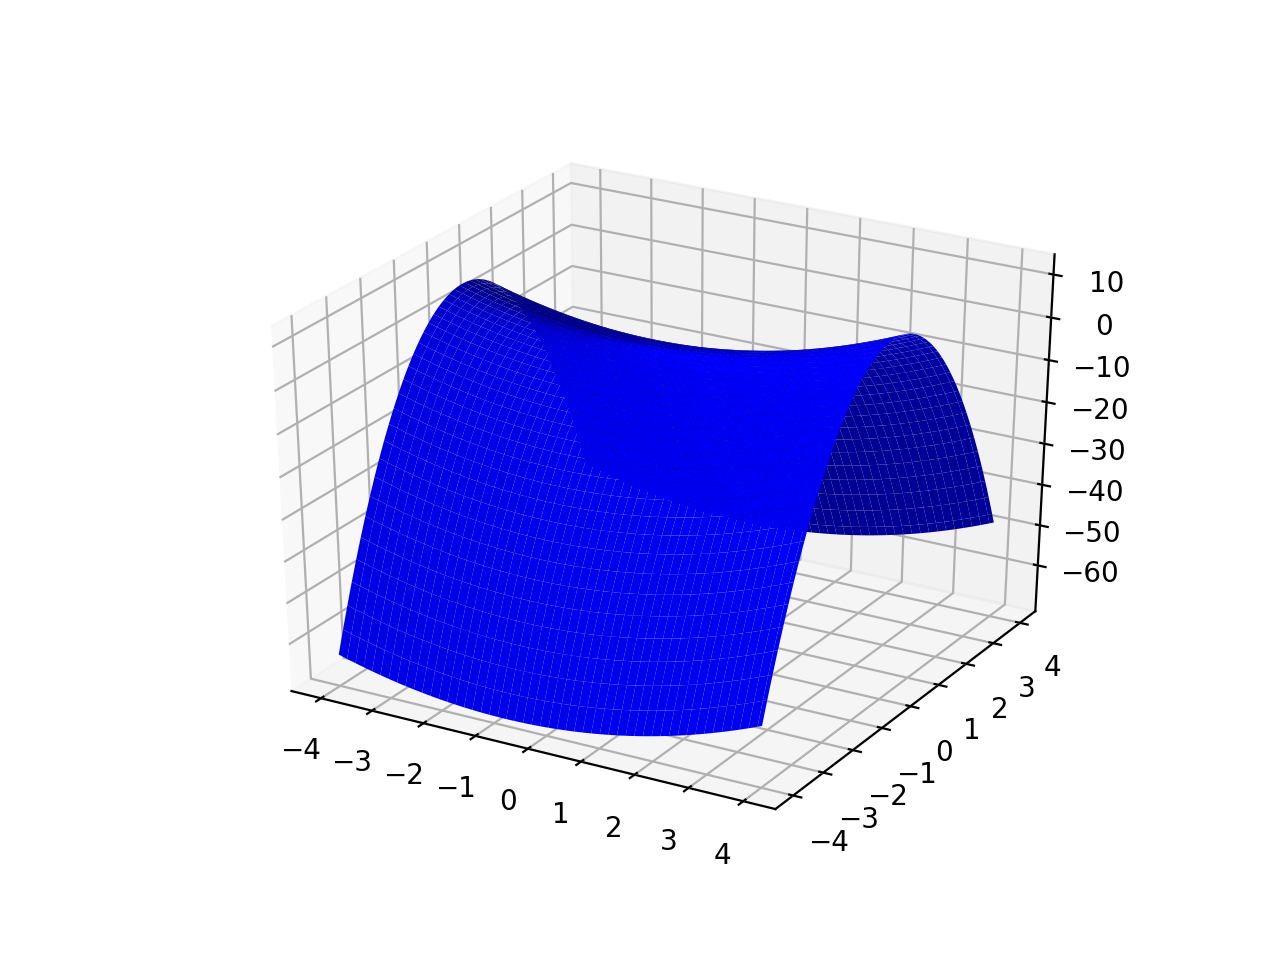

In [371]:
# Samples from surface with noise as in df3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
x = np.linspace(-4,4, 100)
y = np.linspace(-4,4, 100)
X, Y = np.meshgrid(x, y)
a_x2, a_x1, a_y2, a_y1 = np.random.normal(loc=0, scale = 6, size=4)
Z = -(1+a_x2)*X**2/2 + a_x1*X - (1+a_y2)*Y**2/2 + a_y1*Y

# Plot the surface
ax.plot_surface(X, Y, Z, color='b')

plt.show()

In [326]:
def df3(x):
    a_x2, a_x1, a_y2, a_y1 = np.random.normal(loc=0, scale = 6, size=4)
#     Z = -(1+a_x2)*X**2/2 + a_x1*X - (1+a_y2)*Y**2/2 + a_y1*Y
    return np.array([-(.1+a_x2)*x[0]+a_x1, -(.1+a_y2)*x[1]+a_y1])

rate_decay = .000
lr_0 = 0.1
lr_gen = (lr_0/t for t in count(1, rate_decay))
x_0=[3,-3]
max_iter = 80

In [386]:
xs = []
ys = []
zs = []
for i, w in enumerate(sgd(x_0, df3, lr_gen)):
    if i > max_iter:
        break
    X = w[0]
    Y = w[1]
    xs.append(X)
    ys.append(Y)
    zs.append(-0.1*X**2/2 - 0.1*Y**2/2)

<IPython.core.display.Javascript object>


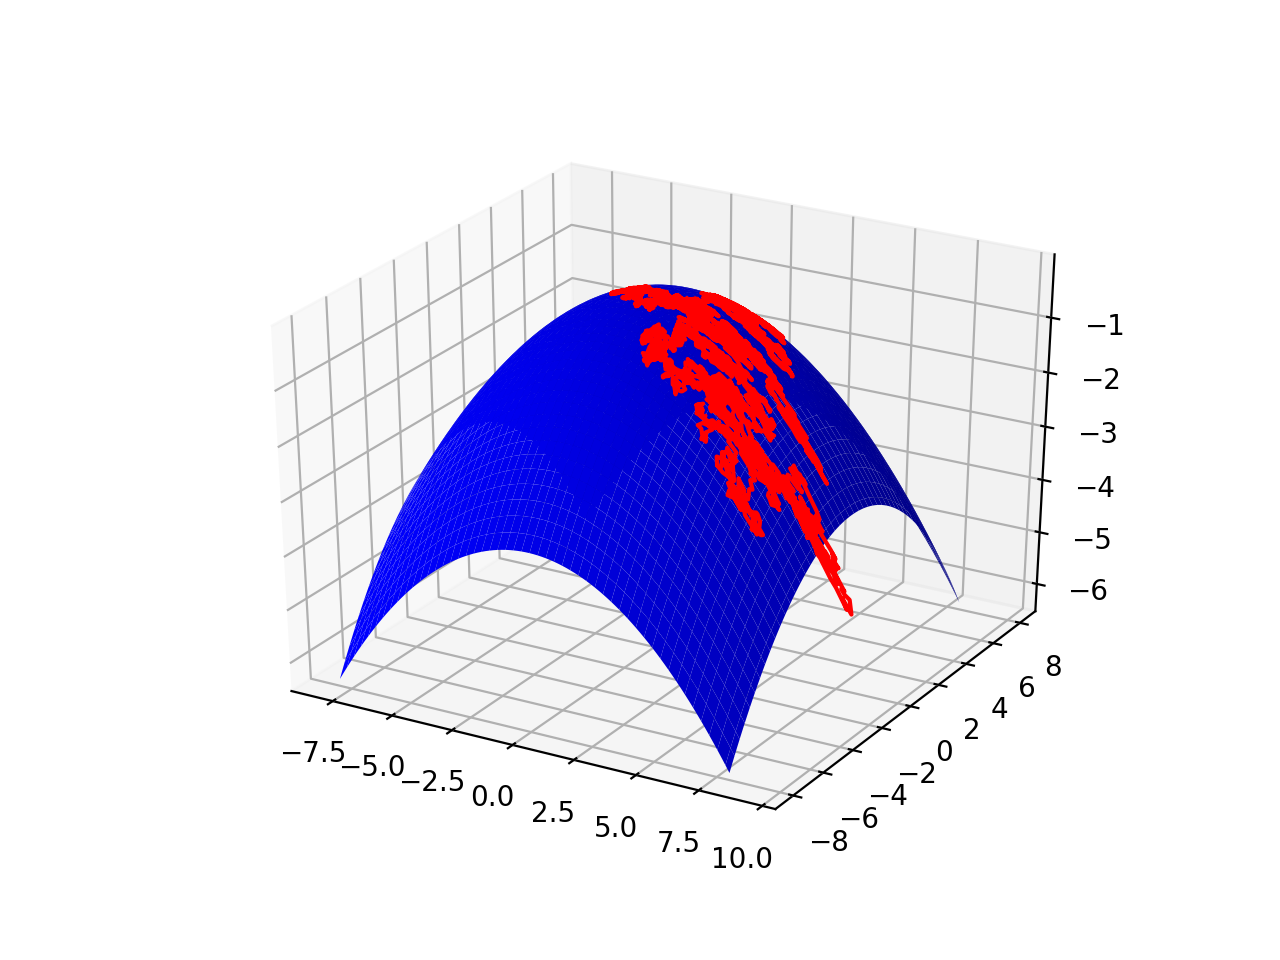

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, color="r")
x = np.linspace(-8,8, 100)
y = np.linspace(-8,8, 100)
X, Y = np.meshgrid(x, y)
Z = - 0.1*X**2/2 - 0.1*Y**2/2
ax.plot_surface(X, Y, Z, color="b")

plt.show()

In [325]:
np.array(list(zip(xs,ys)))

array([[  3.        ,  -3.        ],
       [  2.50367194,  -3.5444075 ],
       [  3.21246511,  -7.1271459 ],
       [  2.76499577,  -9.7145266 ],
       [  0.52780427, -13.40335892],
       [ -1.71507013,  -8.41737706],
       [ -2.78313777,  -9.26234241],
       [ -0.44172304,  -4.82208024],
       [ -0.97519151,  -6.6798223 ],
       [ -0.0712253 , -11.65277873],
       [  0.29019919, -23.44741422],
       [  0.47193464, -11.53574655],
       [  0.45226998, -17.44518811],
       [  0.82340756, -11.8566854 ],
       [  0.99744177,  -3.30521221],
       [  1.50116926,  -4.616941  ],
       [  2.1352647 ,  -6.21422816],
       [  5.78323258,  -7.9344645 ],
       [  7.91845181, -15.38276301],
       [  5.29120581, -13.70344527],
       [  7.35497506,  -5.18565567],
       [ -0.38454475,  -5.10736016],
       [ -0.39994725, -10.31134335],
       [ -1.52344898, -12.31098641],
       [ -0.93208224, -10.1827236 ],
       [ -1.12907585,  -4.76838764],
       [ -0.76722851,  -4.77373644],
 

In [399]:
nn, NN = 1000, 1000
xs = np.zeros([nn,NN])
a = .5
sigma = 1.25
for i in range(nn):
    xs[i,0] = 1
    for j in range(1, NN):
        xs[i, j] = xs[i,j-1]*(1+a+np.random.choice([-sigma, sigma]))

<IPython.core.display.Javascript object>


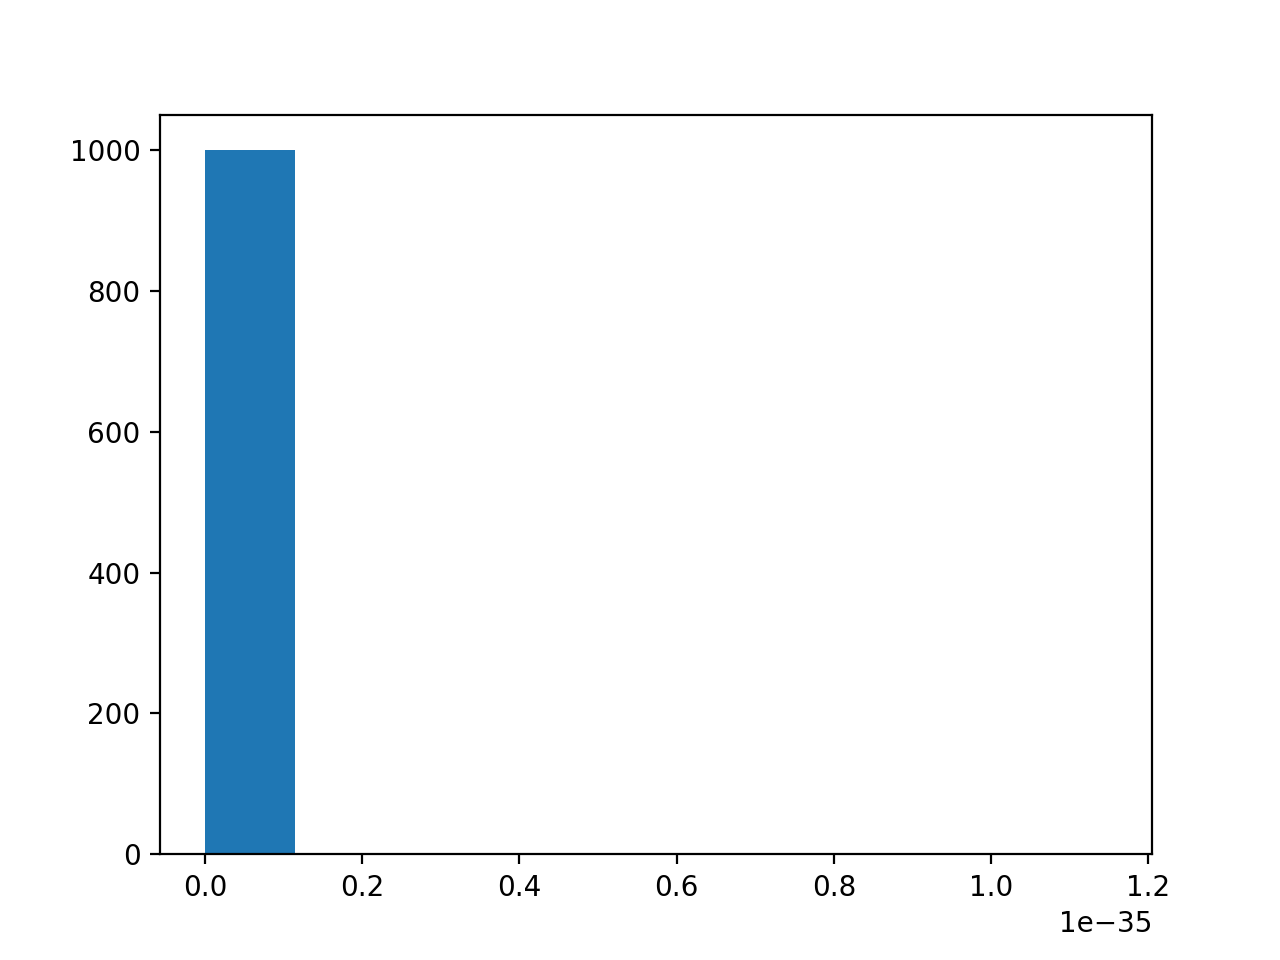

In [400]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs[:,NN-1])
plt.show()